# Python Project on Hepatitis Dataset

## Name: Dhiraj Rajkarnikar
## Student Id: 202382307
## 2023-12-07

In [2]:
# For imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import warnings
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import chi2_contingency

# 1. INTRODUCTION

The given dataset - Hepatits Domain provides the dataset with various attributes and also provides if the patient with the disease was a survivor or not under Class atrribute. The dataset is used to conduct various data analysis procedures such as data inspection, exploration, standardizing and handling outlilers. Based on the analysis we made from our previous processes, the results are summarized.

The project is divided in to three sections - Introduction, Analysis and Conclusion. This introduction section mainly deals with data introduction and preprocessing. A brief overview of how the data is tabulated, what features does it have and what statistical values it provides are examined. Based on that, some pre-processing and data cleaning is done to get the dataset to be in the best possible form to conduct further examination. 

Analysis section contains some graphs and Exploratory Data Analysis to see more indepth about the features. We visualize dataset to understand their main characteristics, identify patterns and spot anomalies.

Finally, based on the preprocessing and analysis, we conclude our findings. 

### 1.1. Import Dataset

In [3]:
df = pd.read_csv("hepatitis.txt", header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1.0
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1.0
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1.0
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1.0
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1.0


### 1.2. Assigning column names

In [4]:
col_names = ['Class', 'Age', 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'Liver_Big','Liver_Firm',
             'Spleen_Palpable', 'Spiders', 'Ascites', 'Varices', 'Bilirubin', 'Alk_Phosphate', 'Sgot','Albumin', 'Protime', 
             'Histology'] 

In [5]:
df.columns = col_names
df.head()

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Palpable,Spiders,Ascites,Varices,Bilirubin,Alk_Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1.0
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1.0
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1.0
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1.0
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1.0


### 1.3. General Description of dataset and handling anomalies

#### Descriptive Statistics of dataset

In [6]:
df.describe()

,Class,Sex,Antivirals,Histology
count,155.000000,155.000000,155.000000,154.000000
mean,1.793548,1.103226,1.845161,1.454545
std,0.406070,0.305240,0.362923,0.499554
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,1.000000,2.000000,1.000000
50%,2.000000,1.000000,2.000000,1.000000
75%,2.000000,1.000000,2.000000,2.000000
max,2.000000,2.000000,2.000000,2.000000


The table above gives statistical description of the data with the number of observations in each numeric column, their mean, standard deviation, minimum and maximum values along with the quartiles.

#### Shape of dataset

In [7]:
df.shape

(155, 20)

The dataset consists of 155 rows and 20 columns.

#### Handling missing or misleading values
The dataset contains '?' or '.' or '9999' or '99999' as values for some observations. First, replacing these with NaN values and counting the total missing values. 

In [8]:
df1 = df.replace('?', np.nan)
df1 = df1.replace('.', np.nan)
df1 = df1.replace(9999, np.nan)
df1 = df1.replace(99999, np.nan)

nan_counts = df1.isna().sum()
missing_data = pd.DataFrame((df1.isnull().sum()) * 100 / df1.shape[0]).reset_index()
print(f"NaN Count\n{nan_counts}")

NaN Count
Class               0
Age                 2
Sex                 0
Steroid             4
Antivirals          0
Fatigue             2
Malaise             1
Anorexia            1
Liver_Big          11
Liver_Firm         11
Spleen_Palpable     6
Spiders             5
Ascites             7
Varices             5
Bilirubin           8
Alk_Phosphate      35
Sgot                4
Albumin            19
Protime            68
Histology           1
dtype: int64


Displaying all the rows and columns of the dataset to inspect and verify missing and misleading values.

In [9]:
#df1

#### Overview of the datatype

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   Age              153 non-null    object 
 2   Sex              155 non-null    int64  
 3   Steroid          151 non-null    object 
 4   Antivirals       155 non-null    int64  
 5   Fatigue          153 non-null    object 
 6   Malaise          154 non-null    object 
 7   Anorexia         154 non-null    object 
 8   Liver_Big        144 non-null    object 
 9   Liver_Firm       144 non-null    object 
 10  Spleen_Palpable  149 non-null    object 
 11  Spiders          150 non-null    object 
 12  Ascites          148 non-null    object 
 13  Varices          150 non-null    object 
 14  Bilirubin        147 non-null    object 
 15  Alk_Phosphate    120 non-null    object 
 16  Sgot             151 non-null    object 
 17  Albumin         

In [11]:
#Getting categorical columns
categorical_cols = df1.select_dtypes(include=['object']).columns
print(categorical_cols)

#Getting numerical columns
numerical_cols = df1.select_dtypes(include=['int', 'float']).columns
print(numerical_cols)

Index(['Age', 'Steroid', 'Fatigue', 'Malaise', 'Anorexia', 'Liver_Big',
       'Liver_Firm', 'Spleen_Palpable', 'Spiders', 'Ascites', 'Varices',
       'Bilirubin', 'Alk_Phosphate', 'Sgot', 'Albumin', 'Protime'],
      dtype='object')
Index(['Class', 'Sex', 'Antivirals', 'Histology'], dtype='object')


As seen from above, 16 variables are classified as categorical columns and 4 variables are numerical variables in the dataset. To generalize, the original dataset has been copied to a new one and all of the parameters will be converted to float type for ease of data cleaning for visualization.

In [12]:
df_converted = df1.copy()
df_converted[categorical_cols] = df_converted[categorical_cols].apply(pd.to_numeric, errors='coerce')

In [13]:
df_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   Age              153 non-null    float64
 2   Sex              155 non-null    int64  
 3   Steroid          151 non-null    float64
 4   Antivirals       155 non-null    int64  
 5   Fatigue          153 non-null    float64
 6   Malaise          154 non-null    float64
 7   Anorexia         154 non-null    float64
 8   Liver_Big        144 non-null    float64
 9   Liver_Firm       144 non-null    float64
 10  Spleen_Palpable  149 non-null    float64
 11  Spiders          150 non-null    float64
 12  Ascites          148 non-null    float64
 13  Varices          150 non-null    float64
 14  Bilirubin        147 non-null    float64
 15  Alk_Phosphate    120 non-null    float64
 16  Sgot             151 non-null    float64
 17  Albumin         

In [14]:
df_converted.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Class,155.0,1.793548,0.406070,1.0,2.00,2.0,2.0,2.0
Age,153.0,41.124183,12.611774,7.0,32.00,39.0,50.0,78.0
Sex,155.0,1.103226,0.305240,1.0,1.00,1.0,1.0,2.0
Steroid,151.0,1.509934,0.501565,1.0,1.00,2.0,2.0,2.0
Antivirals,155.0,1.845161,0.362923,1.0,2.00,2.0,2.0,2.0
Fatigue,153.0,1.352941,0.479454,1.0,1.00,1.0,2.0,2.0
Malaise,154.0,66.519481,805.613494,1.0,1.00,2.0,2.0,9999.0
Anorexia,154.0,1.792208,0.407051,1.0,2.00,2.0,2.0,2.0
Liver_Big,144.0,1.833333,0.373979,1.0,2.00,2.0,2.0,2.0
Liver_Firm,144.0,1.583333,0.494727,1.0,1.00,2.0,2.0,2.0


It looked like some of the columns - Malaise, Spiders and Alk_Phosphate at rows 24, 130 and 135 still have data with 9999 or 99999 on them. Carrying our more data cleaning.

#### Handling more missing or misleading values

In [15]:
df1.replace(9999, np.nan, inplace = True)
df1.replace(99999, np.nan, inplace = True)
df1.replace('9999', np.nan, inplace = True)
df1.replace('99999', np.nan, inplace = True)
nan_counts = df1.isna().sum()
missing_data = pd.DataFrame((df1.isnull().sum())*100/df1.shape[0]).reset_index()
print(f"NaN Count\n{nan_counts}")

NaN Count
Class               0
Age                 2
Sex                 0
Steroid             4
Antivirals          0
Fatigue             2
Malaise             2
Anorexia            1
Liver_Big          11
Liver_Firm         11
Spleen_Palpable     6
Spiders             6
Ascites             7
Varices             5
Bilirubin           8
Alk_Phosphate      37
Sgot                4
Albumin            19
Protime            68
Histology           1
dtype: int64


In [16]:
df1

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Palpable,Spiders,Ascites,Varices,Bilirubin,Alk_Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,NaN,1.0
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,NaN,1.0
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,NaN,1.0
3,2,31,1,NaN,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1.0
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,NaN,200,4.0,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,NaN,242,3.3,50,2.0
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,NaN,2.0
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,NaN,2.0
153,2,NaN,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2.0


In [17]:
#for column in df1.columns:
 #   has_question_mark = "?" in df1[column].values
  #  has_dot = "." in df1[column].values
   # has_9999 = 9999 in df1[column].values
    #has_99999 = 99999 in df1[column].values

    #print(f"Column: {column}")
    #print(f"Contains '?' : {has_question_mark}")
    #print(f"Contains '.' : {has_dot}")
    #print(f"Contains 9999 : {has_9999}")
    #print(f"Contains 99999 : {has_99999}")
    #print("\n")

In [18]:
warnings.simplefilter(action='ignore', category=FutureWarning)

table_rows = []

for column in df1.columns:
    contains_question_mark = "?" in df1[column].values
    contains_dot = "." in df1[column].values
    contains_9999 = 9999 in df1[column].values
    contains_99999 = 99999 in df1[column].values
    contains_9999_str = "9999" in df1[column].values
    contains_99999_str = "99999" in df1[column].values
    
    table_rows.append([column, contains_question_mark, contains_dot, contains_9999, contains_99999, contains_9999_str, contains_99999_str])

headers = ["Column", "Contains '?'", "Contains '.'", "Contains 9999", "Contains 99999", "Contains str_9999", "Contains str_99999"]

print(tabulate(table_rows, headers=headers, tablefmt="grid"))

+-----------------+----------------+----------------+-----------------+------------------+---------------------+----------------------+
| Column          | Contains '?'   | Contains '.'   | Contains 9999   | Contains 99999   | Contains str_9999   | Contains str_99999   |
+=================+================+================+=================+==================+=====================+======================+
| Class           | False          | False          | False           | False            | False               | False                |
+-----------------+----------------+----------------+-----------------+------------------+---------------------+----------------------+
| Age             | False          | False          | False           | False            | False               | False                |
+-----------------+----------------+----------------+-----------------+------------------+---------------------+----------------------+
| Sex             | False          | False      

In [19]:
print("NaN Counts:",df1.isnull().sum().sum())

NaN Counts: 194


Now the data has been cleaned of all the misleading values. Next is cleaning the data of all NaN values with backfill method.

#### Replacing NaN values

In [20]:
df2 = df1.bfill()
df2

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Palpable,Spiders,Ascites,Varices,Bilirubin,Alk_Phosphate,Sgot,Albumin,Protime,Histology
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,80,1.0
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,80,1.0
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,80,1.0
3,2,31,1,2,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1.0
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,95,200,4.0,75,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,1,46,1,2,2,1,1,1,2,2,2,1,1,1,7.60,126,242,3.3,50,2.0
151,2,44,1,2,2,1,2,2,2,1,2,2,2,2,0.90,126,142,4.3,48,2.0
152,2,61,1,1,2,1,1,2,1,1,2,1,2,2,0.80,75,20,4.1,48,2.0
153,2,43,2,1,2,1,2,2,2,2,1,1,2,1,1.50,81,19,4.1,48,2.0


In [21]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Class,155.0,1.793548,0.406070,1.0,2.0,2.0,2.0,2.0
Sex,155.0,1.103226,0.305240,1.0,1.0,1.0,1.0,2.0
Antivirals,155.0,1.845161,0.362923,1.0,2.0,2.0,2.0,2.0
Histology,155.0,1.451613,0.499266,1.0,1.0,1.0,2.0,2.0


In [22]:
print("NaN Counts:",df2.isnull().sum().sum())

NaN Counts: 0


It seems like all the NaN values have been replaced with the backfill method and also there are no '.', '?', '9999' or '99999' values any longer in the dataset to give us misleading information.

# 2. DATA ANALYSIS

### 2.1. Changing categorical variables to numerical variables

In [23]:
df3 = df2.copy()

In [24]:
categorical_cols

Index(['Age', 'Steroid', 'Fatigue', 'Malaise', 'Anorexia', 'Liver_Big',
       'Liver_Firm', 'Spleen_Palpable', 'Spiders', 'Ascites', 'Varices',
       'Bilirubin', 'Alk_Phosphate', 'Sgot', 'Albumin', 'Protime'],
      dtype='object')

In [25]:
# Display unique values in the columns before conversion
#for col in numerical_cols_to_convert:
 #   print(f"\nUnique values in '{col}' before conversion:")
#    print(df3[col].unique())

# Convert columns to regular numerical values in a loop
for col in categorical_cols:
    df3[col] = pd.to_numeric(df3[col], errors='coerce')

# Display unique values in the columns after conversion
#for col in numerical_cols_to_convert:
 #   print(f"\nUnique values in '{col}' after conversion:")
 #   print(df3[col].unique())


In [26]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   Age              155 non-null    int64  
 2   Sex              155 non-null    int64  
 3   Steroid          155 non-null    int64  
 4   Antivirals       155 non-null    int64  
 5   Fatigue          155 non-null    int64  
 6   Malaise          155 non-null    int64  
 7   Anorexia         155 non-null    int64  
 8   Liver_Big        155 non-null    int64  
 9   Liver_Firm       155 non-null    int64  
 10  Spleen_Palpable  155 non-null    int64  
 11  Spiders          155 non-null    int64  
 12  Ascites          155 non-null    int64  
 13  Varices          155 non-null    int64  
 14  Bilirubin        155 non-null    float64
 15  Alk_Phosphate    155 non-null    int64  
 16  Sgot             155 non-null    int64  
 17  Albumin         

In [27]:
df3.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Class,155.0,1.793548,0.406070,1.0,2.00,2.0,2.0,2.0
Age,155.0,41.322581,12.743185,7.0,32.00,39.0,50.0,78.0
Sex,155.0,1.103226,0.305240,1.0,1.00,1.0,1.0,2.0
Steroid,155.0,1.516129,0.501360,1.0,1.00,2.0,2.0,2.0
Antivirals,155.0,1.845161,0.362923,1.0,2.00,2.0,2.0,2.0
Fatigue,155.0,1.354839,0.480015,1.0,1.00,1.0,2.0,2.0
Malaise,155.0,1.600000,0.491486,1.0,1.00,2.0,2.0,2.0
Anorexia,155.0,1.793548,0.406070,1.0,2.00,2.0,2.0,2.0
Liver_Big,155.0,1.838710,0.368991,1.0,2.00,2.0,2.0,2.0
Liver_Firm,155.0,1.587097,0.493952,1.0,1.00,2.0,2.0,2.0


### 2.2. Exploratory Data Analysis

#### Generating correlation matrix and correlation heatmap

In [28]:
correlation_matrix = df3.corr()
correlation_matrix

,Class,Age,Sex,Steroid,Antivirals,Fatigue,Malaise,Anorexia,Liver_Big,Liver_Firm,Spleen_Palpable,Spiders,Ascites,Varices,Bilirubin,Alk_Phosphate,Sgot,Albumin,Protime,Histology
Class,1.000000,-0.248060,0.173051,0.112148,-0.130196,0.311644,3.318692e-01,0.133638,-0.050327,0.057855,2.342606e-01,0.380274,0.469334,0.362385,-0.441954,-0.070257,-0.064819,0.384594,0.245786,-0.337856
Age,-0.248060,1.000000,-0.011955,-0.056720,-0.008787,-0.288471,-1.213043e-01,0.092011,-0.118675,-0.141697,-8.012302e-02,-0.194952,-0.050830,-0.065307,0.194846,-0.041728,0.086522,-0.248368,-0.203166,0.179039
Sex,0.173051,-0.011955,1.000000,-0.053382,-0.089249,-0.074340,-2.597038e-02,0.015886,-0.081830,-0.060017,-4.847804e-02,-0.073305,0.130587,0.056792,-0.061099,0.099468,-0.013074,0.039044,0.092865,-0.137450
Steroid,0.112148,-0.056720,-0.053382,1.000000,0.049502,0.151448,2.108185e-01,0.080253,0.207207,0.053287,4.848826e-02,0.050275,-0.064598,-0.068893,-0.054498,-0.010280,-0.044320,0.232134,0.076184,-0.081172
Antivirals,-0.130196,-0.008787,-0.089249,0.049502,1.000000,-0.055310,-2.184260e-02,-0.042072,0.054746,0.075717,-1.645476e-01,-0.153038,-0.164747,-0.155148,0.175174,0.102537,0.101840,-0.119545,-0.001314,0.209242
Fatigue,0.311644,-0.288471,-0.074340,0.151448,-0.055310,1.000000,5.780060e-01,0.378272,0.105254,0.293303,1.926687e-01,0.384153,0.285450,0.184642,-0.287583,-0.080642,-0.201543,0.286509,0.153472,-0.158201
Malaise,0.331869,-0.121304,-0.025970,0.210819,-0.021843,0.578006,1.000000e+00,0.592159,0.035806,0.144437,-1.535809e-16,0.312386,0.314270,0.156200,-0.281792,-0.140410,-0.195420,0.259314,0.221493,-0.158777
Anorexia,0.133638,0.092011,0.015886,0.080253,-0.042072,0.378272,5.921588e-01,1.000000,0.036347,0.090229,3.253620e-02,0.278998,0.184053,0.163378,-0.271811,-0.091640,-0.233946,0.180727,0.044613,-0.081623
Liver_Big,-0.050327,-0.118675,-0.081830,0.207207,0.054746,0.105254,3.580574e-02,0.036347,1.000000,0.451659,9.595939e-02,0.208525,-0.116465,-0.104204,-0.054222,-0.067769,0.050755,-0.057477,0.013420,-0.060262
Liver_Firm,0.057855,-0.141697,-0.060017,0.053287,0.075717,0.293303,1.444367e-01,0.090229,0.451659,1.000000,1.861628e-01,0.347711,0.068088,0.186821,-0.092417,-0.236402,-0.103168,0.191912,0.173307,-0.186863


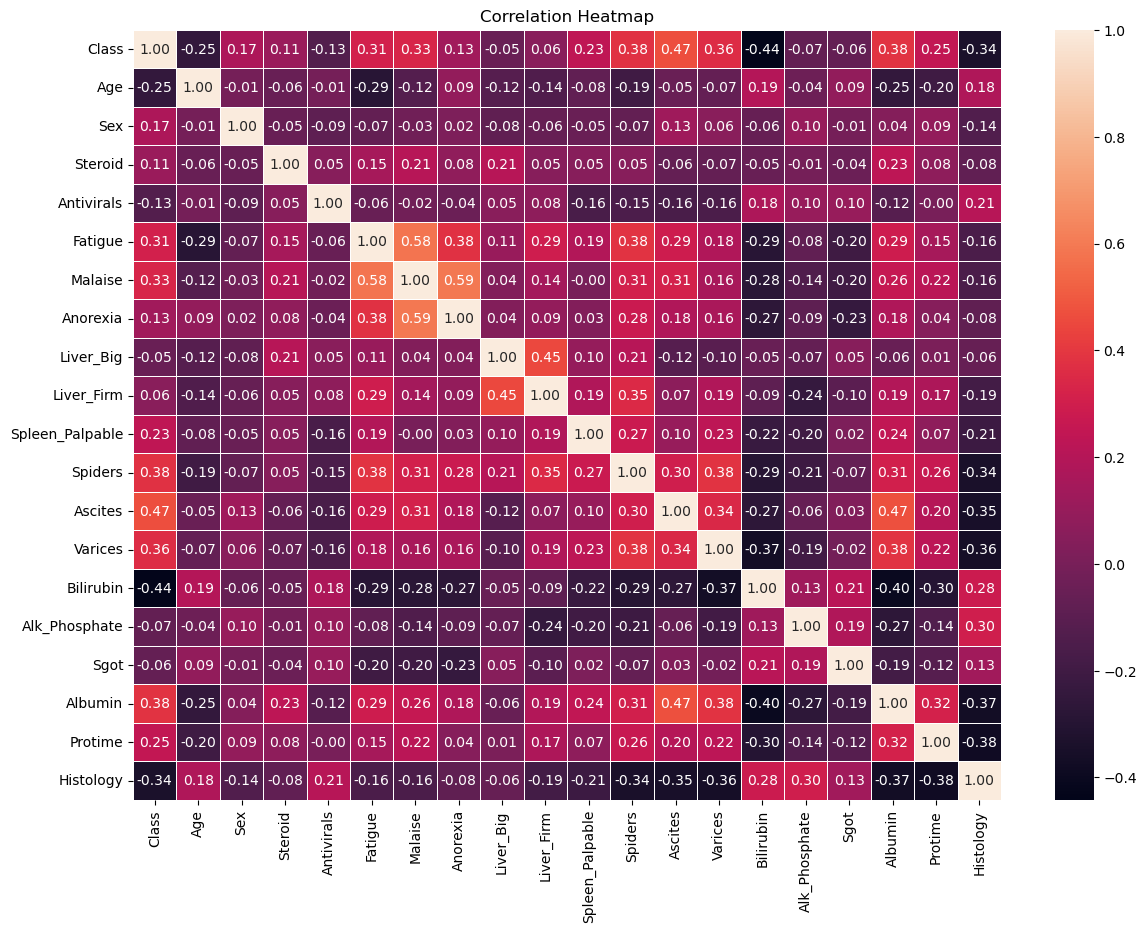

In [29]:
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

From the correlation heatmap, we can see most of the columns have a relatively low correlation with each other. But some columns do have a positive correlation coefficient up to 0.59 which is not a concerning factor. Therefore, we can say that there is not a very strong correlation between the different columns. Some of the highlights are:
Class:
Strong negative correlation with 'Bilirubin' (-0.44), 'Histology' (-0.34), and 'Ascites' (-0.47).
Strong positive correlation with 'Ascites' (0.47), 'Spiders' (0.38), 'Varices' (0.36), and 'Albumin' (0.38).

Age:
Weak negative correlations with 'Class' (-0.25) and 'Albumin' (-0.25).
Weak positive correlation with 'Spiders' (0.31).

Fatigue:
Moderate positive correlations with 'Class' (0.31), 'Malaise' (0.33), 'Spiders' (0.38), 'Ascites' (0.47), 'Varices' (0.36), and 'Albumin' (0.38).
Weak negative correlation with 'Sgot' (-0.20).

Malaise:
Moderate positive correlations with 'Class' (0.33), 'Fatigue' (0.58), 'Spiders' (0.31), 'Ascites' (0.31), 'Varices' (0.16), and 'Albumin' (0.26).

Spiders:
Strong positive correlations with 'Class' (0.38), 'Fatigue' (0.38), 'Malaise' (0.31), 'Ascites' (0.29), 'Varices' (0.38), and 'Albumin' (0.31).

Ascites:
Strong positive correlations with 'Class' (0.47), 'Fatigue' (0.29), 'Malaise' (0.31), 'Spiders' (0.29), 'Varices' (0.37), and 'Albumin' (0.47).
Weak negative correlation with 'Sgot' (-0.27).

Varices:
Strong positive correlations with 'Class' (0.36), 'Fatigue' (0.18), 'Malaise' (0.16), 'Spiders' (0.38), 'Ascites' (0.37), and 'Albumin' (0.36).
Strong negative correlation with 'Bilirubin' (-0.37).

Bilirubin:
Strong negative correlations with 'Class' (-0.44), 'Albumin' (-0.40), and 'Sgot' (-0.40).
Moderate positive correlation with 'Histology' (0.28).

Sgot:
Weak negative correlation with 'Class' (-0.06).
Moderate positive correlation with 'Bilirubin' (0.40).
Weak negative correlation with 'Ascites' (-0.27).

Albumin:
Strong positive correlations with 'Class' (0.38), 'Fatigue' (0.29), 'Malaise' (0.26), 'Spiders' (0.31), 'Ascites' (0.47), and 'Varices' (0.36).
Strong negative correlation with 'Bilirubin' (-0.40).

Histology:
Strong negative correlations with 'Class' (-0.34), 'Bilirubin' (0.28), 'Sgot' (0.13), 'Alk_Phosphate' (0.14), and 'Protime' (-0.38).
Weak positive correlation with 'Sex' (-0.14).

We will take the parameter "CLASS" as our response variable as it makes sense that our prediction is to see if a patient who has incurred Hepatitis is likely to survive or decease. Based on that, taking a look at some EDA. 


#### Correlation matrix with "CLASS"

In [30]:
correlation_matrix = df3.corr()

correlation_with_class = correlation_matrix['Class']

print("\nCorrelation with the 'Class' column:")
print(correlation_with_class)


Correlation with the 'Class' column:
Class              1.000000
Age               -0.248060
Sex                0.173051
Steroid            0.112148
Antivirals        -0.130196
Fatigue            0.311644
Malaise            0.331869
Anorexia           0.133638
Liver_Big         -0.050327
Liver_Firm         0.057855
Spleen_Palpable    0.234261
Spiders            0.380274
Ascites            0.469334
Varices            0.362385
Bilirubin         -0.441954
Alk_Phosphate     -0.070257
Sgot              -0.064819
Albumin            0.384594
Protime            0.245786
Histology         -0.337856
Name: Class, dtype: float64


Above is the correlation matrix of each parameter with Class. The parameters - Age, Antivirals, Liver_Big, Bilirubin, Alk_phosphate, Sgot, Histology are negetively correlated with the Class parameter. This means these columns are as the value for these columns increase, the likelihood of being in "Live" category of Class parameter may slightly decrease. Similarly the other columns have positive correlation with the Class incurring that with the increase in values for those columns the likelihood of being in "Live" category of Class parameter also increases. 

#### Ratio of patients who die or live after contracting Hepatitis

In [31]:
df3['Class'].value_counts()

2    123
1     32
Name: Class, dtype: int64

In [32]:
patients = df3.shape[0]
survivors = (np.sum(df3['Class'] == 2)/patients)*100
non_survivors = (np.sum(df3['Class'] == 1)/patients)*100
print(f"Survivors:{survivors:.2f}%")
print(f"Non_survivors: {non_survivors:.2f}%")

Survivors:79.35%
Non_survivors: 20.65%


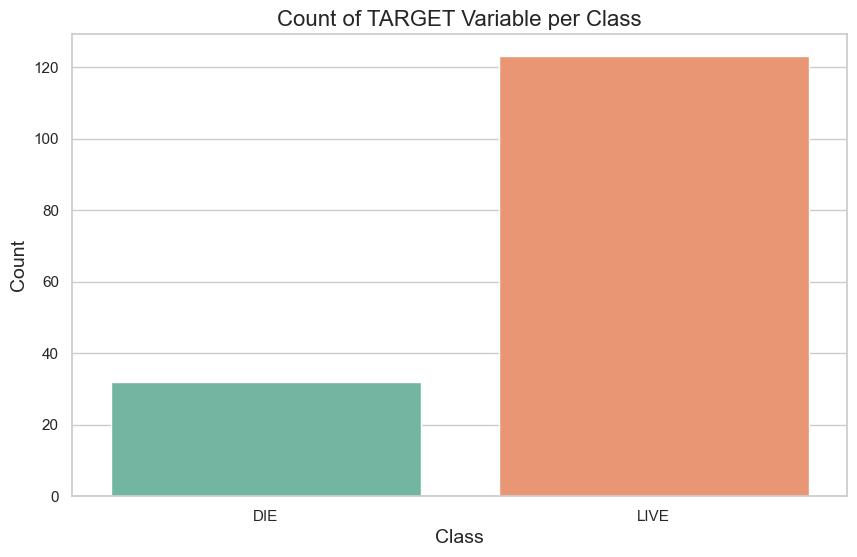

In [33]:
class_counts = df3['Class'].value_counts()

sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette="Set2")

plt.xlabel("Class", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Count of TARGET Variable per Class", fontsize=16)
    
plt.xticks([0, 1], ['DIE', 'LIVE'], rotation=0)

plt.show()

From the document we know, 1 = DIE and 2 = LIVE. It seems like more people live even after contracting Hepatitis i.e. 123 people have lived which accounts for around 79.35% and 32 have died which accounts for around 20.65% of the total patients. The bar graph clearly gives a visual representation. 

#### Distribution plots

In [34]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Class            155 non-null    int64  
 1   Age              155 non-null    int64  
 2   Sex              155 non-null    int64  
 3   Steroid          155 non-null    int64  
 4   Antivirals       155 non-null    int64  
 5   Fatigue          155 non-null    int64  
 6   Malaise          155 non-null    int64  
 7   Anorexia         155 non-null    int64  
 8   Liver_Big        155 non-null    int64  
 9   Liver_Firm       155 non-null    int64  
 10  Spleen_Palpable  155 non-null    int64  
 11  Spiders          155 non-null    int64  
 12  Ascites          155 non-null    int64  
 13  Varices          155 non-null    int64  
 14  Bilirubin        155 non-null    float64
 15  Alk_Phosphate    155 non-null    int64  
 16  Sgot             155 non-null    int64  
 17  Albumin         

Since, 'Age', 'Bilirubin', 'Alk_Phosphate', 'Sgot', 'Albumin', 'Protime' are the only ones with non-boolean values, we categorize them separately to conduct some analysis. And leave the rest of the columns to do their own separate analysis.

In [35]:
num_vars = ['Age', 'Bilirubin', 'Alk_Phosphate', 'Sgot', 'Albumin', 'Protime']
nonnum_vars = ['Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'Liver_Big',
           'Liver_Firm', 'Spleen_Palpable', 'Spiders', 'Ascites', 'Varices', 'Histology']

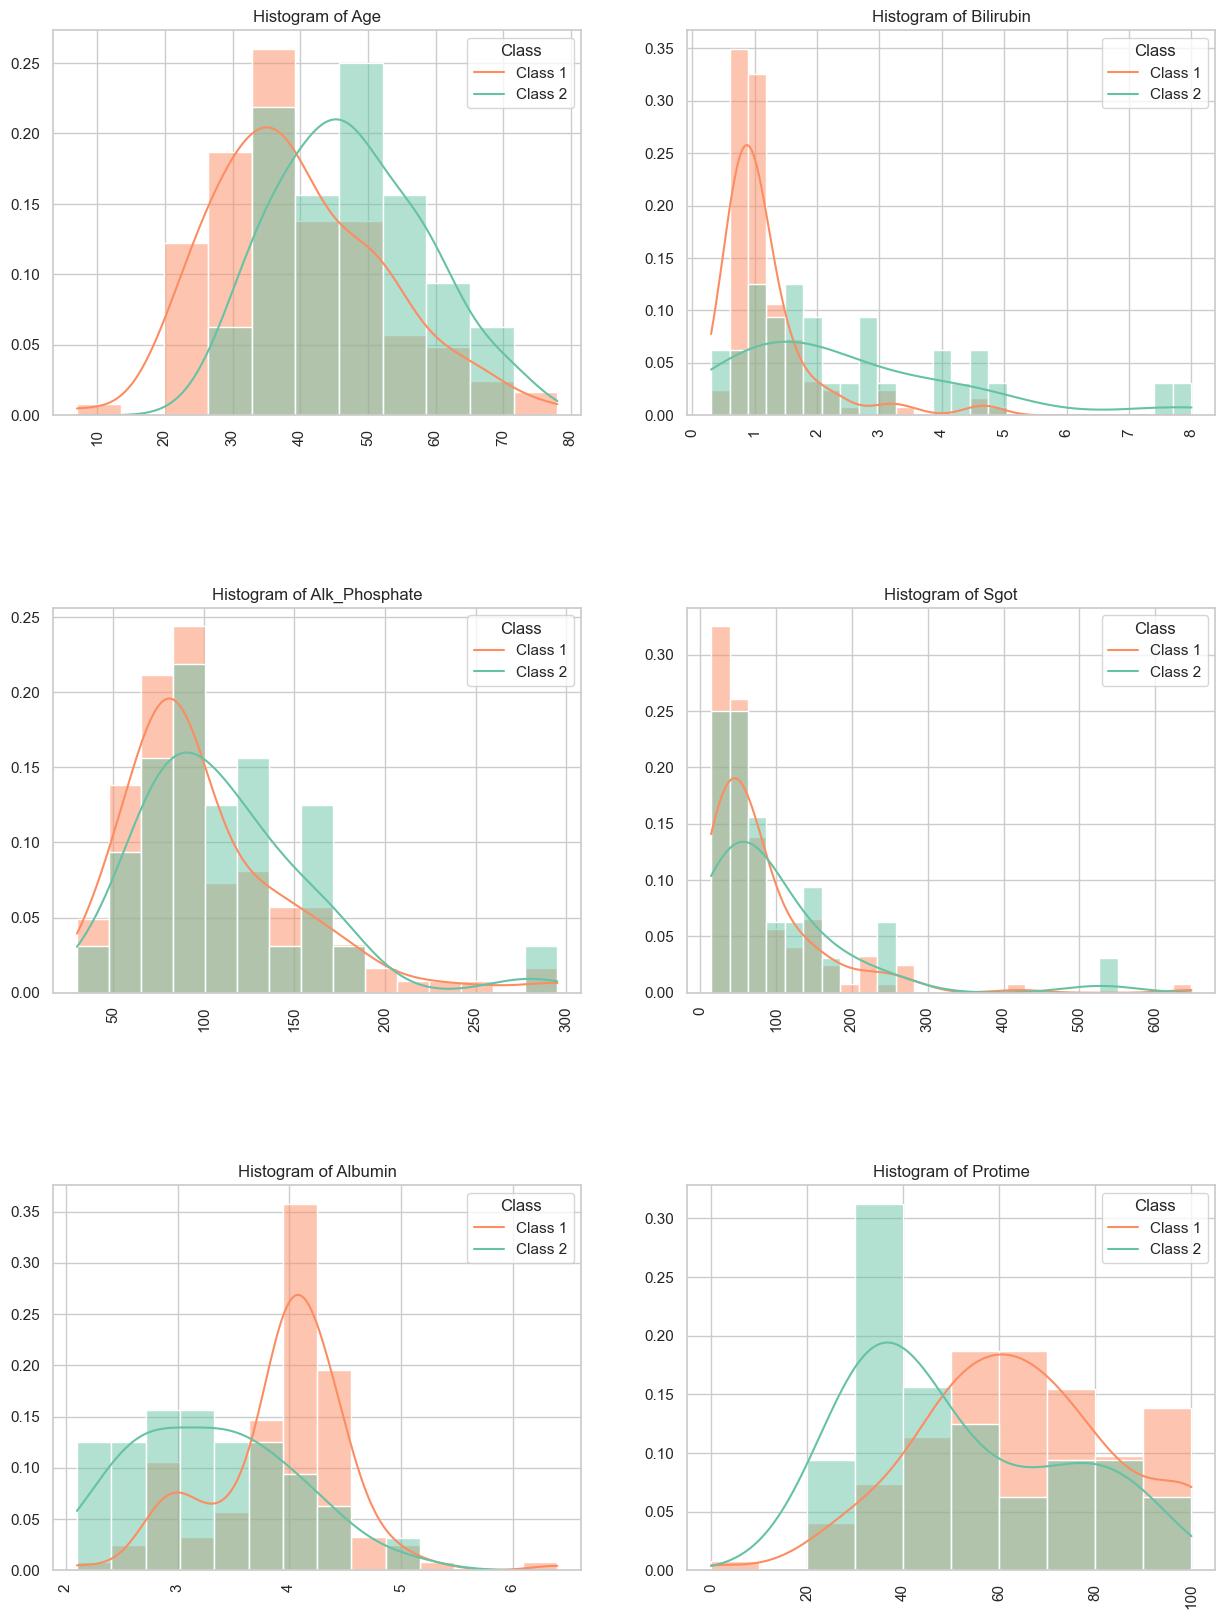

In [36]:
fig, axes = plt.subplots(3, 2, figsize=(15, 20))
axes = axes.flatten()

for i, column in enumerate(num_vars[0:]):
    sns.histplot(data=df3, x=column, stat='probability', kde=True, ax=axes[i], hue='Class', common_norm=False, palette="Set2")

    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
    axes[i].legend(title='Class', labels=['Class 1', 'Class 2'])
    axes[i].tick_params(axis='x', rotation=90)

fig.subplots_adjust(hspace=0.5)
plt.show()

#### Description for 'Age', 'Bilirubin', 'Alk_Phosphate', 'Sgot', 'Albumin', 'Protime'

In [37]:
df3[num_vars].describe(include = "all")

,Age,Bilirubin,Alk_Phosphate,Sgot,Albumin,Protime
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,41.322581,1.452258,104.232258,84.722581,3.803871,61.141935
std,12.743185,1.231214,48.609739,88.783154,0.674574,21.700571
min,7.000000,0.300000,30.000000,14.000000,2.100000,0.000000
25%,32.000000,0.700000,76.000000,31.500000,3.350000,46.000000
50%,39.000000,1.000000,85.000000,55.000000,4.000000,62.000000
75%,50.000000,1.500000,126.500000,99.000000,4.200000,75.000000
max,78.000000,8.000000,295.000000,648.000000,6.400000,100.000000


The above histograms show the distribution of data for 'Age', 'Bilirubin', 'Alk_Phosphate', 'Sgot', 'Albumin', 'Protime'. As we can see, the distribution of Age is almost normal. For Age, Bilirubin, Alk_Phosphate and SGOT, it is skewed towards the right side. And we can also see for these column the mean is greater than median value. For Albumin and Protime, the mean is smaller in value than median which is also indicated in the histogram for these columns.  

### 2.3. Outlier checking and removal

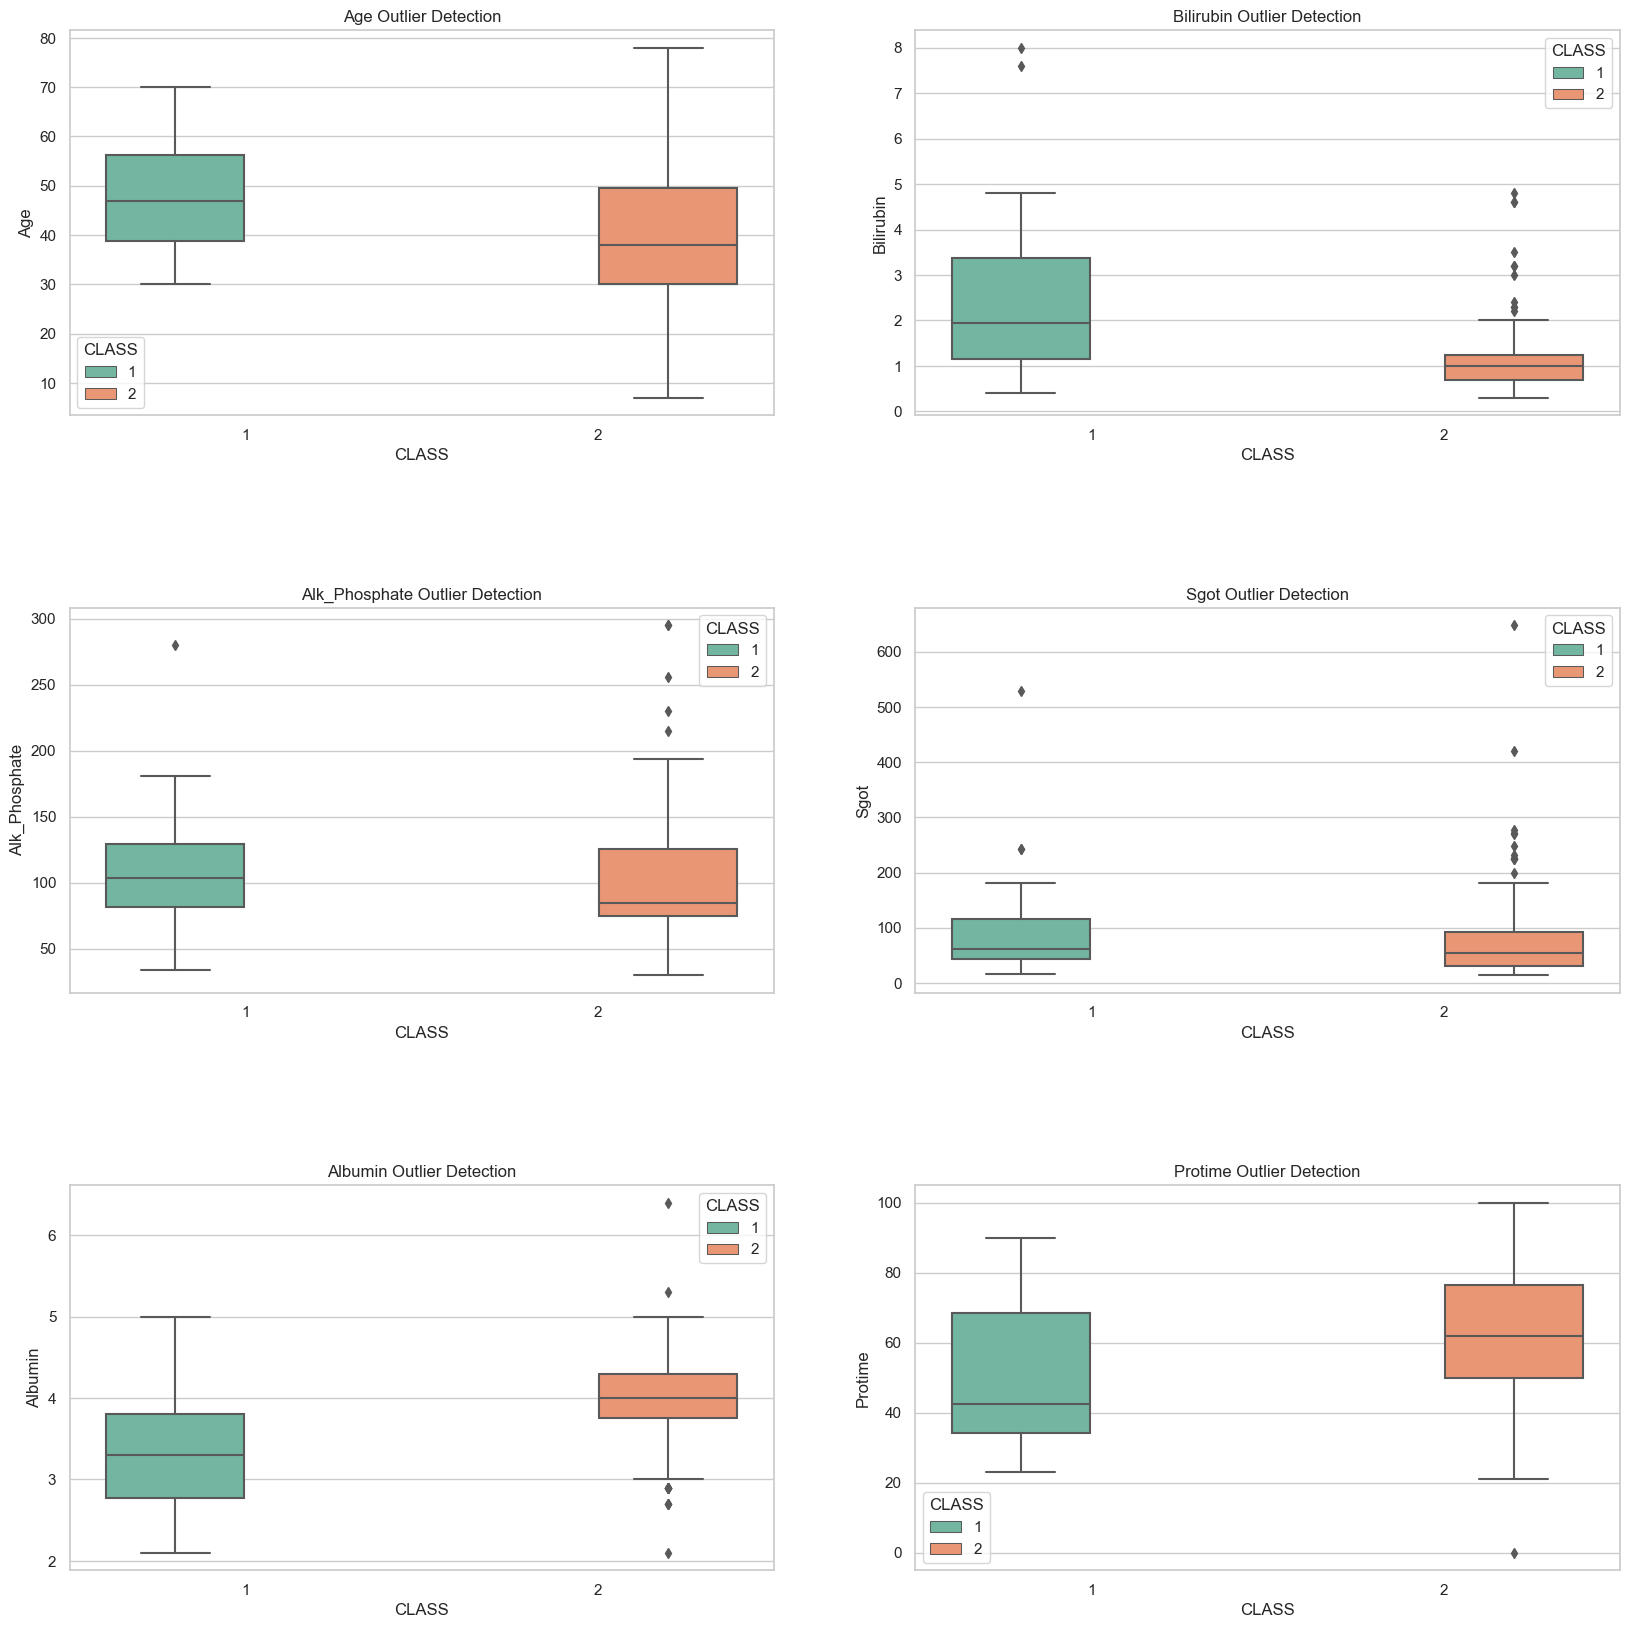

In [38]:
sns.set_palette("Set2")

fig, axes = plt.subplots(3, 2, figsize=(20, 20))
axes = axes.flatten()

for i, column in enumerate(num_vars[0:]):
    sns.boxplot(x='Class', y=column, data=df3, hue='Class', ax=axes[i]).set_title(f"{column} Outlier Detection")

    axes[i].set_xlabel('CLASS')
    axes[i].set_ylabel(column)
    axes[i].legend(title='CLASS')

fig.subplots_adjust(hspace=0.5)
plt.show()

As we can see from the above boxplots, "Age" does not have any outliers. "Bilirubin" has some outliers for both the values of "Class" parameter". "Alk_Phosphate" has one for "Die" value of "Class" and some for "Live" value of "Class". "SGOT" also has some outliers for both values of "Class". "Albumin" has some outliers outside of the upper and lower range of "Live" value of "Class" parameter. And "Protime" has one below the lower bound for "Live" value of "Class" parameter. 

In [39]:
Q1 = df3[num_vars].quantile(0.25)
Q3 = df3[num_vars].quantile(0.75)
IQR = Q3 - Q1

def filter_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    return (df3[column] >= lower_bound) & (df3[column] <= upper_bound)

outlier_filter = pd.DataFrame()
for column in num_vars:
    outlier_filter[column] = filter_outliers(column)

#print("Outlier Filter DataFrame:")
#print(outlier_filter)

df_no_outliers = df3[outlier_filter.all(axis=1)]

print("Original DataFrame shape:", df3.shape)
print("DataFrame shape after removing outliers:", df_no_outliers.shape)

Original DataFrame shape: (155, 20)
DataFrame shape after removing outliers: (117, 20)


Therefore, the size of the dataframe has been reduced from 155 to 117 after removing all the outliers from 'Age', 'Bilirubin', 'Alk_Phosphate', 'Sgot', 'Albumin', 'Protime'.

#### Diagrams for non-numeric variables 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'Liver_Big', 'Liver_Firm', 'Spleen_Palpable', 'Spiders', 'Ascites', 'Varices', 'Histology'

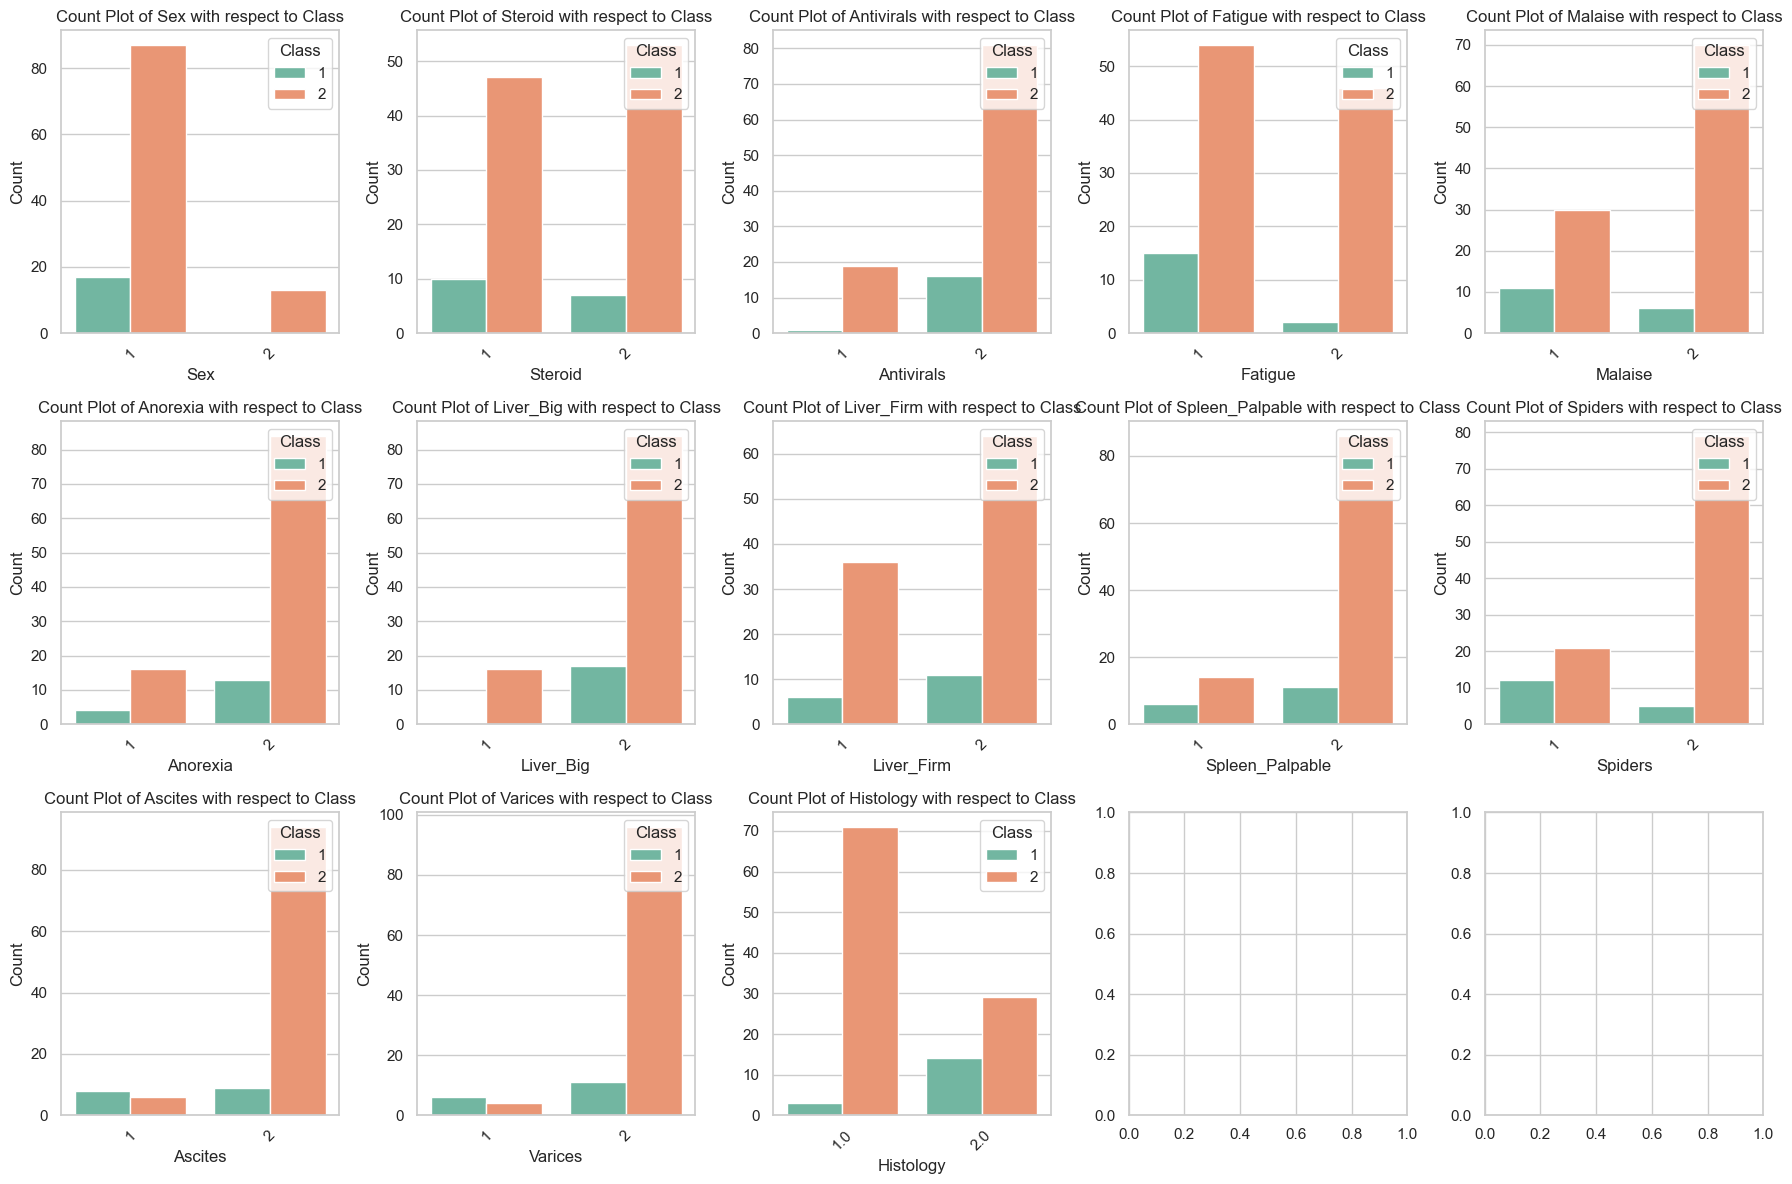

In [40]:
num_subplots = len(nonnum_vars)
num_rows = 3
num_cols = 5

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(18, 4 * num_rows))
axes = axes.flatten()

for i, column in enumerate(nonnum_vars):
    if i < num_subplots:
        sns.countplot(data=df_no_outliers, x=column, hue='Class', palette='Set2', ax=axes[i])
        axes[i].set_xlabel(column)
        axes[i].set_ylabel('Count')
        axes[i].set_title(f'Count Plot of {column} with respect to Class')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].legend(title='Class', loc='upper right')
    else:
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

The histograms show the distribution of each of the mentioned variables with respect to "Class" (1 = Die, 2 = Live)
From the diagrams above, we can see the following patterns:

1. Sex (1 = Male, 2 = Female): The majority of individuals in the dataset are male compared to female. And it seems like some male patients have also died because of the disease.

2. Steroid (1 = No, 2 = Yes): Most individuals have positive value for steroids. Class distribution appears balanced between those who have taken steroids and those who haven't.

3. Antivirals (1 = No, 2 = Yes): The majority of individuals have taken antiviral drugs. Patients even after taking antiviral drugs have died but majority of them have lived.

4. Fatigue (1 = No, 2 = Yes): Fatigue seems prevalent in the dataset, with most individuals experiencing it.Both classes show a significant presence of fatigue, some patients without fatigue have also died which suggests it may not be a differentiator.

5. Malaise (1 = No, 2 = Yes): Malaise is also common in the dataset, with most individuals experiencing it. Similar to fatigue, malaise is present in both classes.

6. Anorexia (1 = No, 2 = Yes): Anorexia also seems common, with most individuals experiencing it but does not seem to be of any affect to Hepatits.

7. Liver_Big (1 = No, 2 = Yes): The majority of individuals have an enlarged liver. Patients with big liver seem to have some death due to Hepatits.

8. Liver_Firm (1 = No, 2 = Yes): Firm liver is predominant in the dataset. But unlike Liver_Big, people without firm liver also seem to die because of the disease. 

9. Spleen_Palpable (1 = No, 2 = Yes): Most individuals have a palpable spleen. The distribution across classes is fairly consistent, suggesting spleen palpability may not be a strong indicator.

10. Spiders(1 = No, 2 = Yes): Spider veins are common, with the majority having them. And with respect to Class, patients without spider viens have more deaths than with. 

11. Ascites (1 = No, 2 = Yes): Ascites is more common, with the majority having it. The distribution across classes is somewhat balanced, with both classes having individuals with and without ascites.

12. Varices (1 = No, 2 = Yes): Varices are more common, with the majority having them. The distribution across classes is somewhat balanced, with both classes having individuals with and without varices.

13. Histology(1 = No, 2 = Yes): Most individuals have a histology value of 1.0 meaning there number of patients with histology is very less. And for class distribution, the patients with histology have higher chance of being in non-survivor class.

### 2.4. Contingency Table for further confirmation

#### Contingency Table for 'Age', 'Bilirubin', 'Alk_Phosphate', 'Sgot', 'Albumin', 'Protime' attributes

Comparing the mean of the mentioned groups with each "Class" attribute.

In [41]:
for var in num_vars:
    class_1 = df_no_outliers[df_no_outliers['Class'] == 1][var]
    class_2 = df_no_outliers[df_no_outliers['Class'] == 2][var]
    t_stat, p_value = ttest_ind(class_1, class_2)
    print(f'Test for {var}: {p_value:.4f}')

Test for Age: 0.1030
Test for Bilirubin: 0.0153
Test for Alk_Phosphate: 0.1971
Test for Sgot: 0.5311
Test for Albumin: 0.0000
Test for Protime: 0.1407


1. Age:
p-value = 0.1030
With a p-value of 0.1030, we fail to reject the null hypothesis at a significance level of 0.05. There is not enough evidence to conclude that there is a significant difference in the mean age between two values of Class.
2. Bilirubin:
p-value = 0.0153
The p-value of 0.0153 is less than the significance level of 0.05. Therefore, we reject the null hypothesis. This suggests that there is a significant difference in the mean bilirubin levels between  two values of Class.
3. Alk_Phosphate:
p-value = 0.1971
The p-value of 0.1971 is greater than the significance level of 0.05. Thus, we fail to reject the null hypothesis. There is not enough evidence to conclude that there is a significant difference in the mean alkaline phosphatase levels between two values of Class.
4. Sgot:
p-value = 0.5311
With a p-value of 0.5311, we fail to reject the null hypothesis at a significance level of 0.05. There is not enough evidence to suggest a significant difference in the mean serum glutamic oxaloacetic transaminase levels between two values of Class.
5. Albumin:
p-value = 0.0000
The p-value is less than 0.05, indicating strong evidence to reject the null hypothesis. There is a significant difference in the mean albumin levels between two values of Class.
6. Protime:
Result: p-value = 0.1407
The p-value of 0.1407 is greater than the significance level of 0.05. Therefore, we fail to reject the null hypothesis. There is not enough evidence to conclude that there is a significant difference in the mean prothrombin time levels between two values of Class.

In summary, based on a significance level of 0.05:
Bilirubin and Albumin levels show significant differences between Class 1 and Class 2 patients.
Age, Alk_Phosphate, Sgot, and Protime do not show significant differences between the classes.

#### Contingency table for 'Sex', 'Steroid', 'Antivirals', 'Fatigue', 'Malaise', 'Anorexia', 'Liver_Big', 'Liver_Firm', 'Spleen_Palpable', 'Spiders', 'Ascites', 'Varices', 'Histology'

In [42]:
for var in nonnum_vars:
    contingency_table = pd.crosstab(df_no_outliers[var], df_no_outliers['Class'])
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f'Chi-Square Test for {var}: {p_value:.4f}')

Chi-Square Test for Sex: 0.2463
Chi-Square Test for Steroid: 0.5227
Chi-Square Test for Antivirals: 0.3272
Chi-Square Test for Fatigue: 0.0170
Chi-Square Test for Malaise: 0.0125
Chi-Square Test for Anorexia: 0.6789
Chi-Square Test for Liver_Big: 0.1635
Chi-Square Test for Liver_Firm: 1.0000
Chi-Square Test for Spleen_Palpable: 0.0707
Chi-Square Test for Spiders: 0.0001
Chi-Square Test for Ascites: 0.0000
Chi-Square Test for Varices: 0.0001
Chi-Square Test for Histology: 0.0001


1. Sex: p-value = 0.2463
2. Steroid: p-value = 0.5227
3. Antivirals: p-value = 0.3272
4. Anorexia: p-value = 0.6789
5. Liver_Big: p-value = 0.1635
6. Liver_Firm:p-value = 1.0000
7. Spleen_Palpable: p-value = 0.0707
Explanation for the parameters above: The p-value of 0.0707 is greater than the significance level of 0.05. Thus, we fail to reject the null hypothesis. There is not enough evidence to suggest a significant association between palpable spleen and class.

8. Fatigue: Result: p-value = 0.0170
9. Malaise: Result: p-value = 0.0125
10. Spiders: Result: p-value = 0.0001
11. Ascites: Result: p-value = 0.0000
12. Varices: Result: p-value = 0.0001
13. Histology: Result: p-value = 0.0001
Explanation for the parameters above: The p-value is less than 0.05, indicating strong evidence to reject the null hypothesis. There is a significant association between histology and class.

### 2.5. Kernel Density plot

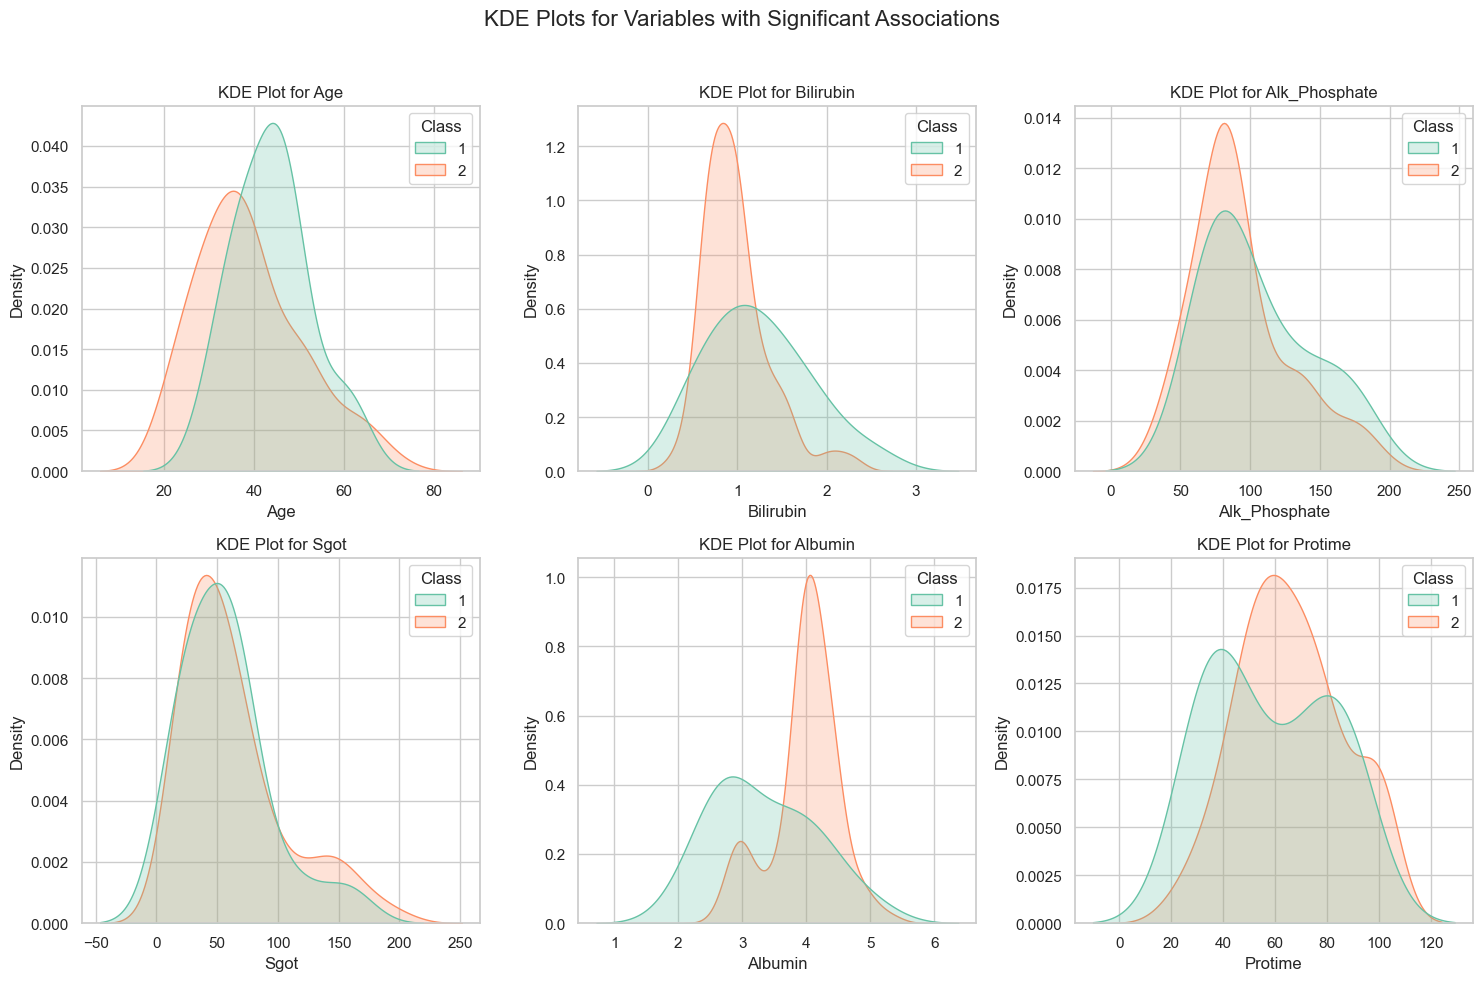

In [43]:
num_vars = ['Age', 'Bilirubin', 'Alk_Phosphate', 'Sgot', 'Albumin', 'Protime']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
fig.suptitle('KDE Plots for Variables with Significant Associations', fontsize=16)

axes = axes.flatten()

for i, var in enumerate(num_vars):
    sns.kdeplot(data=df_no_outliers, x=var, hue='Class', fill=True, common_norm=False, ax=axes[i], palette='Set2')
    axes[i].set_title(f'KDE Plot for {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Density')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# 3. CONCLUSION

The dataset provided for Hepatitis included with various numerical and categorical attributes was imported and various analysis, visualization, inspection and cleaning was conducted to investigate what sort of information could be extracted and what kind of prediction can we make from the dataset. 

Initially, the data was given some descriptive attribute names (column names) and with the features in python, we tried to learn more about the distribution, description and shape of data. It was clear that there were missing and misleading values in the dataset for which several steps were taken to clear the dataset with misleading values and use backfill to fill out the missing values. 

The major goal of the project was to determine if a patient is going to live or die if they contract Hepatitis i.e. "Class" is our target variable and all other are reponse variable. During data analysis, various plots and diagrams were used to visualize the distribution of data, figure out the correlation between attributes and also determine outliers. The outliers were cleared using inter-quartile range values. Since, the dataset has numeric and categorical attributes, separate tests were done to get the idea about each type of attributes. We concluded that being male has higher chances of contracting the disease and also some males who contract the disease might not survive. Similarly, all other attributes were compared to figure out what kind of significance they had to our target variable. And finally for further confirmation, simple hypothesis testing was done with p-value and $\alpha = 0.05.$

In summary, all the processes carried out in this project is a compilation of what we learned in class. And the learnings were used to determine the properties of various parameters with respect to the "Class" attribute of the dataset. 